# Working with Classification Trees in Python

## Learning Objectives

Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

- How to import, explore and prepare data
- How to build a Classification Tree model
- How to visualize the structure of a Classification Tree
- How to Prune a Classification Tree


## 1. Collect the Data


In [1]:
import pandas as pd

## 2. Explore the Data


In [2]:
# getting a concise summary of the structure data
loan = pd.read_csv("loan.csv")

In [3]:
# getting summary statistics of the data

loan.describe()


,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

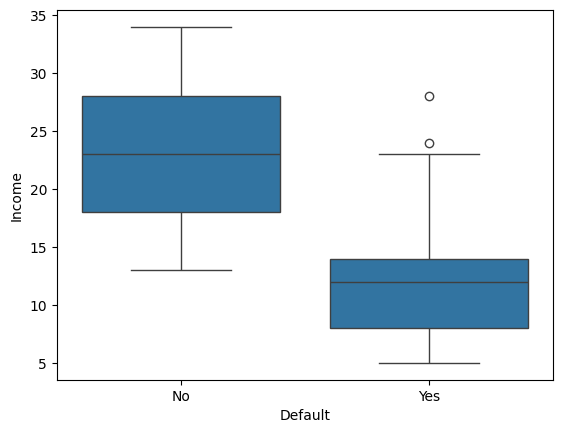

In [5]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')

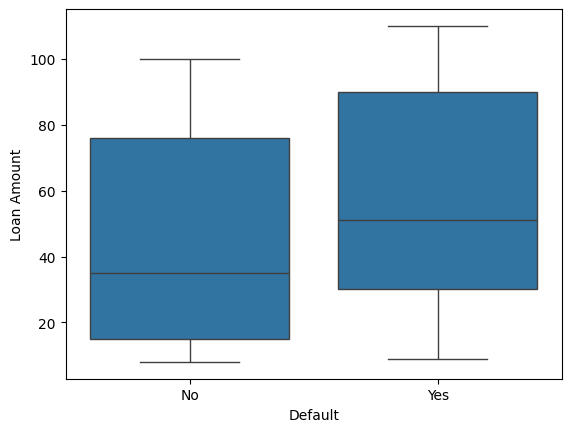

In [6]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

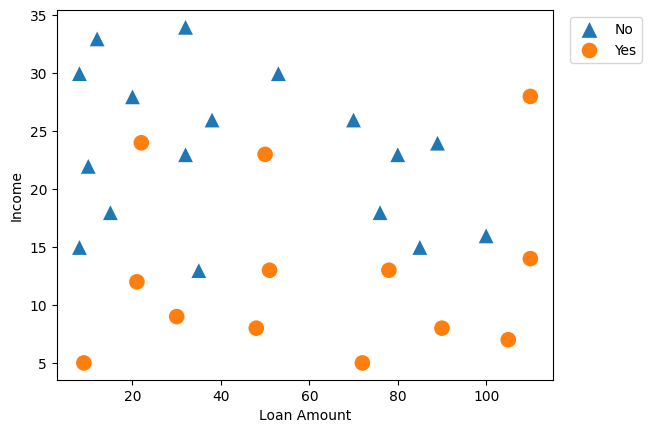

In [7]:
ax = sns.scatterplot(data = loan, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data


In [8]:
# default - dependent variable


In [9]:
# income and loan amount - independent variables
X = loan[['Income', 'Loan Amount']]
y = loan['Default']
# splitting the data into training and test sets


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 4. Train and Evaluate the Classification Tree


In [11]:
# importing the DecisionTreeClassifier class from sklearn.tree sub-package

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = DecisionTreeClassifier(random_state = 42)

model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

## 5. Visualize the Classification Tree


[Text(0.5555555555555556, 0.875, 'Income <= 14.5\ngini = 0.469\nsamples = 24\nvalue = [15, 9]\nclass = No'),
 Text(0.3333333333333333, 0.625, 'Loan Amount <= 41.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Yes'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'Loan Amount <= 28.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Yes'),
 Text(0.7777777777777778, 0.625, 'Loan Amount <= 105.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = No'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = No'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes')]

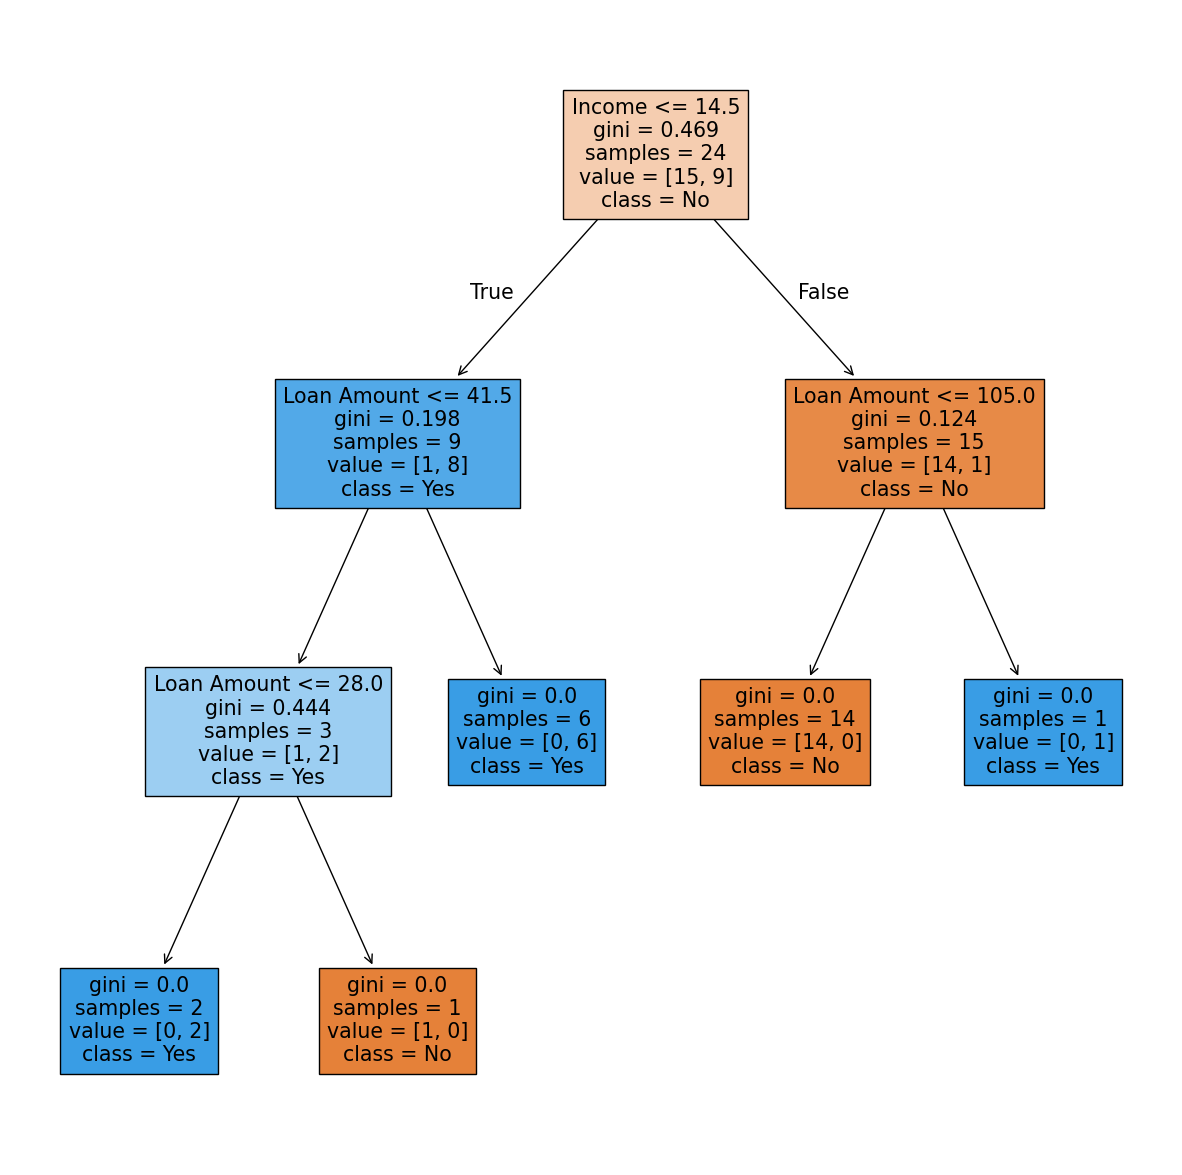

In [14]:
# importing the tree object from sklearn package
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model,
               feature_names = list(X.columns), # independent variables
               class_names = ['No', 'Yes'], # possible values of the dependent variable in ascending order
               filled = True)

- Income is the most important variable in the dataset since it is used as the very first split criteria.
- The branch to the left of each node is for the Yes response, while the branch to the right is for the No response.
- Samples within each partition gets smaller and smaller towards the leaf nodes (and as the tree gets bigger).
- The "value" in each node represents the number of "No" and "Yes" items (['No', 'Yes']).
- One of the benefits of decisions is that they are pretty good at ranking the effectiveness of independent variables in predicting the values of the dependent variable.


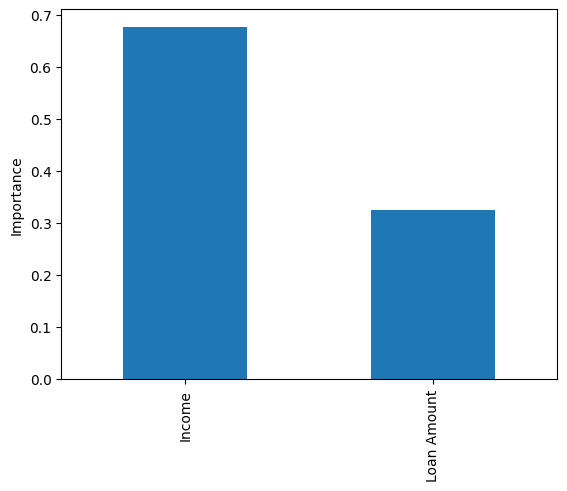

In [15]:
# visualizing the feature importances of the independent variables
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

The income variable is much more important than the loan amount variable.


## 6. Prune the Classification Tree


In [16]:
model.score(X_train, y_train)

1.0

The model is 100% accurate on the training data. Highly suspicious.


In [17]:
model.score(X_test, y_test)

0.5

The model is only 50% accurate on the test data. The model definitely overfitted to the training data; thus, pruning is needed.


In [18]:
# setting parameters to manage the growth of the tree
# for pre-pruning (only pre-pruning is used)
grid = {'max_depth' : [2, 3, 4, 5], # maximum depth of the decision tree 
        'min_samples_split' : [2, 3, 4], # minimum number of items in the partition before it can be split (values between 1 and 40 is best, according to studies)
        'min_samples_leaf' : [1, 2, 3, 4, 5, 6]} # minimum number of items in the leaf node (values between 1 and 20 are best, according to studies)

In [19]:
# importing the GrdSearchCV class from the sklearn.model_selection sub-package
# allows the use of grid search to find the best combination of parameter values for the tree
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [20]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, random_state=1234)

In [21]:
# getting the accuracy for the train data
model_.score(X_train, y_train)

0.9166666666666666

In [22]:
# getting the accuracy for the test data
model_.score(X_test, y_test)

0.6666666666666666

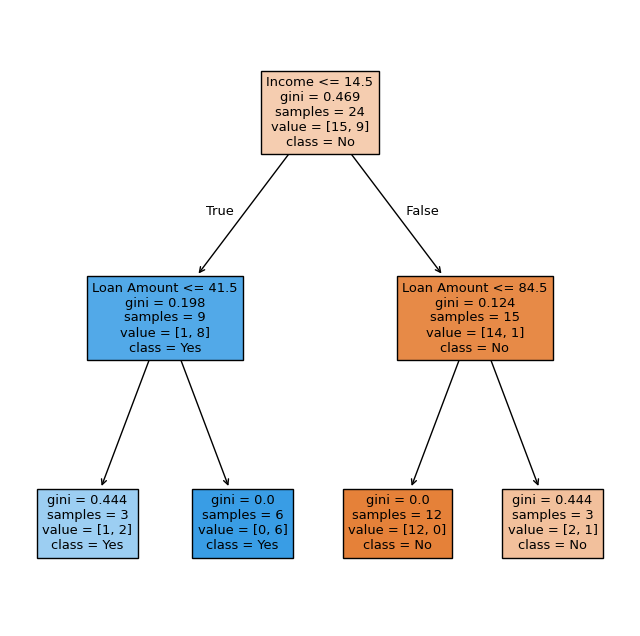

In [23]:
# visualizing the pruned model
plt.figure(figsize = (8,8))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);

The pruned tree is much smaller, but it generalizes better compared to the previous tree.
